In [1]:
#Import libraries
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter
import os
import glob
import re

In [5]:
#Load Data

test_type = '\\Comparison Strain Rate'
exp_type = 'Frontend'  #Frontend or Backend

sample_type =''


#Access directory
dir = r'F:\My Drive\Oxford 2022-24\DIHPB_Foam\Figures\Rohacell'
path = dir + sample_type
#Save directory
save_dir = os.path.join(path,'Figures')
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
savename = save_dir + test_type + '.png'
#Save directory
save_dir = r'F:\My Drive\Oxford 2022-24\DIHPB_Foam\Analysed_Python'
analysed_data = os.path.join(save_dir,exp_type)
if not os.path.exists(analysed_data):
    os.makedirs(analysed_data)

#Search for all excel files
csv_files = Path(path).glob('*.csv')
xlsx_files = Path(path).glob('*.xlsx')
all_files = list(csv_files) + list(xlsx_files)
all_files=sorted(all_files)
experiments = {} #dict

#Combine then into a dataframe then into a nested dictionary 

for filename in all_files:
    filename_str = str(filename)
    #For csv files
    if filename_str.endswith('.csv'):
        df = pd.read_csv(filename, usecols = ['Strain','Stress'], index_col = None, header=0) #we only want strain and stress columns
        df = df.dropna()
        test_name = os.path.basename(filename)
        test_name = os.path.splitext(test_name)[0]
        strain = df['Strain'].values
        stress = df['Stress'].values
        experiments.update({test_name:{"strain": strain,"stress":stress}}) #nested
    #for xlsx files    
    elif filename_str.endswith(('.xls','xlsx')):
        df = pd.read_excel(filename, usecols = ['Strain','Stress'], index_col = None, header=0) #we only want strain and stress columns
        df = df.dropna()
        test_name = os.path.basename(filename)
        test_name = os.path.splitext(test_name)[0]
        strain = df['Strain'].values
        stress = df['Stress'].values
        experiments.update({test_name:{"strain": strain,"stress":stress}}) #nested

In [6]:
#Find Mean and S.D.
if exp_type == 'Frontend':
    data_list1 = ['Rohacell_Real_40_1','Rohacell_Real_40_2','Rohacell_Real_40_3']
    data_list2 = ['Rohacell_Real_65_1','Rohacell_Real_65_2','Rohacell_Real_65_3']
elif exp_type == 'Backend':
    data_list1 = ['Rohacell_Real_40R_1','Rohacell_Real_40R_2','Rohacell_Real_40R_3']
    data_list2 = ['Rohacell_Real_65R_1','Rohacell_Real_65R_2','Rohacell_Real_65R_3']
elif exp_type == 'ALL':
    data_list1 = ['Rohacell_Real_40_1','Rohacell_Real_40_2','Rohacell_Real_40_3']
    data_list2 = ['Rohacell_Real_65_1','Rohacell_Real_65_2','Rohacell_Real_65_3']
    data_list3 = ['Rohacell_Real_40R_1','Rohacell_Real_40R_2','Rohacell_Real_40R_3']
    data_list4 = ['Rohacell_Real_65R_1','Rohacell_Real_65R_2','Rohacell_Real_65R_3']

#Interpolate the dataset to match the length before calculating the statistical parameters
#Data 1
combined_strain = pd.DataFrame()
for key in data_list1:
    strain_df = pd.DataFrame(experiments[key]['strain'],columns=[key])
    combined_strain = pd.concat([combined_strain,strain_df],axis=1)

strain_mean_1 = combined_strain.mean(axis=1)

combined_stress = pd.DataFrame()
for key in data_list1:
    stress_df = pd.DataFrame(experiments[key]['stress'],columns=[key])
    combined_stress = pd.concat([combined_stress,stress_df],axis=1)

stress_mean_1 = combined_stress.mean(axis=1)
stress_sd_1 = combined_stress.std(axis=1)

#Data 2
combined_strain_2 = pd.DataFrame()
for key in data_list2:
    strain_df_2 = pd.DataFrame(experiments[key]['strain'],columns=[key])
    combined_strain_2 = pd.concat([combined_strain_2,strain_df_2],axis=1)

strain_mean_2 = combined_strain_2.mean(axis=1)

combined_stress_2 = pd.DataFrame()
for key in data_list2:
    stress_df_2 = pd.DataFrame(experiments[key]['stress'],columns=[key])
    combined_stress_2 = pd.concat([combined_stress_2,stress_df_2],axis=1)

stress_mean_2 = combined_stress_2.mean(axis=1)
stress_sd_2 = combined_stress_2.std(axis=1)

stress_mean_1 = stress_mean_1 - stress_mean_1[0]
stress_mean_2 = stress_mean_2 - stress_mean_2[0]


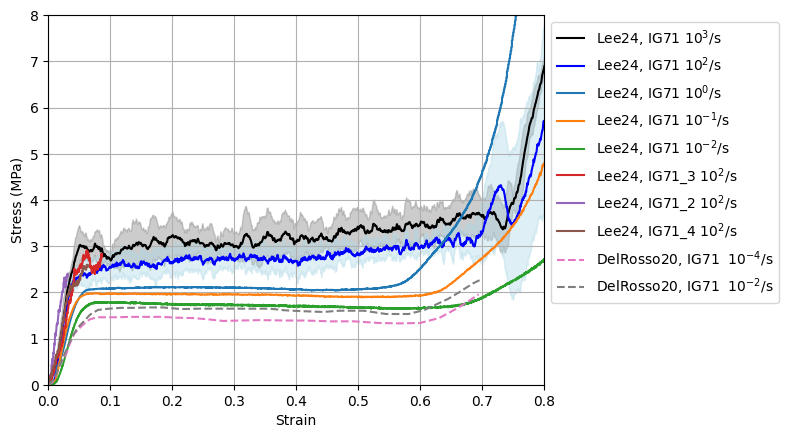

In [9]:
#Plot Figures

colour1 = 'lightblue'
colour2 = 'grey'

#ICBM
plt.fill_between(strain_mean_2,stress_mean_2*1e-6+stress_sd_2*1e-6,stress_mean_2*1e-6-stress_sd_2*1e-6,color=colour2,alpha=0.4)
plt.plot(strain_mean_2,(stress_mean_2-0.5)*1e-6, label='Lee24, IG71 $10^3$/s', color='black')


plt.fill_between(strain_mean_1,stress_mean_1*1e-6+stress_sd_1*1e-6,stress_mean_1*1e-6-stress_sd_1*1e-6,color=colour1,alpha=0.4)
plt.plot(strain_mean_1,(stress_mean_1-0.5)*1e-6, label='Lee24, IG71 $10^2$/s', color='blue')

#Instron
plt.plot(experiments['Rohacell_Instron_1.0']['strain'],experiments['Rohacell_Instron_1.0']['stress'], label = 'Lee24, IG71 $10^{0}$/s')
plt.plot(experiments['Rohacell_Instron_0.1']['strain'],experiments['Rohacell_Instron_0.1']['stress'], label = 'Lee24, IG71 $10^{-1}$/s')
plt.plot(experiments['Rohacell_Instron_0.01']['strain'],experiments['Rohacell_Instron_0.01']['stress'], label = 'Lee24, IG71 $10^{-2}$/s')





#Reference
#plt.plot(experiments['Reference_IG110_0.01']['strain'],experiments['Reference_IG110_0.01']['stress']*1e-6, label = 'DelRosso20, IG110 $10^{-2}$/s',color='red', linestyle='--')
#plt.plot(experiments['Reference_IG110_0.1']['strain'],experiments['Reference_IG110_0.1']['stress']*1e-6, label = 'DelRosso20, IG110 $10^{-1}$/s',color='green', linestyle='--')

#plt.plot(experiments['Reference_IG71_0.0001']['strain'],experiments['Reference_IG71_0.0001']['stress']*1e-6, label = 'Cote09, IG71  $10^{-4}$/s',marker = 'x', linestyle='-')
plt.plot(experiments['Reference_IG71_0.0001']['strain'],experiments['Reference_IG71_0.0001']['stress']*1e-6, label = 'DelRosso20, IG71  $10^{-4}$/s', linestyle='--')
plt.plot(experiments['Reference_IG71_0.01']['strain'],experiments['Reference_IG71_0.01']['stress']*1e-6, label = 'DelRosso20, IG71  $10^{-2}$/s', linestyle='--')

#plt.plot(experiments['Reference_WF71_1000']['strain'],experiments['Reference_WF71_1000']['stress']*1e-6, label = 'Poxon12, WF71 $10^3$/s', linestyle='--')
#plt.plot(experiments['Reference_WF110_1000']['strain'],experiments['Reference_WF110_1000']['stress']*1e-6, label = 'Poxon12, WF110 $10^3$/s', linestyle='--')

#plt.legend('IG-F,{10^2}/s','IG-F,{10^3}/s')
#plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.legend(loc = 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.xlabel("Strain")
plt.ylabel("Stress (MPa)")
plt.ylim(0,8)
plt.xlim(0,0.8)
#Save figure as png file
plt.savefig(savename,bbox_inches='tight')

In [ ]:
#Save dataset as csv file
#Analysed data
analysed_dataset = pd.DataFrame({'Strain_100': strain_mean_1, 'Stress_100': stress_mean_1, 'Strain_1000': strain_mean_2, 'Stress_1000': stress_mean_2})
#Combined data
all_dataset = analysed_dataset
#Convert and save as csv
filename3 = analysed_data + '\\' + test_type + '.csv'
filename4 = analysed_data + '\\' + test_type + '' 'Parameters' + '.csv'

all_dataset.to_csv(filename3, index=False)
parameters_df.to_csv(filename4, index=False)

In [ ]:
#This is for calculating the enegineering parameters of each test sample

%matplotlib 

parameters_df = pd.DataFrame(columns=['Sample','Elastic Limit Strain','Elastic Limit Stress','Yield Strain','Yield Stress','Densification Strain','Densification Stress'])

dfs =[]
for item, values in experiments.items():
    plt.plot(values['strain'],values['stress'], label=item)
    plt.xlabel('Strain')
    plt.ylabel('Stress')
    plt.title('Select for Elastic Lim, Yield and Densification for {}'.format(item))
    #Select points
    selection_pt = plt.ginput(n=3,show_clicks=True,timeout=-1)
    #Input value into each column
    df_item = pd.DataFrame({
        'Sample': [item],
        'Elastic Limit Strain': [selection_pt[0][0]],
        'Elastic Limit Stress': [selection_pt[0][1]],
        'Yield Strain': [selection_pt[1][0]],
        'Yield Stress': [selection_pt[1][1]],
        'Densification Strain': [selection_pt[2][0]],
        'Densification Stress': [selection_pt[2][1]]
    })

    dfs.append(df_item)
    plt.close()

parameters_df = pd.concat(dfs, ignore_index = True)